In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import time
import functools

ModuleNotFoundError: No module named 'tensorflow.python.platform'

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [4]:
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

content_image = load_img("monkey.jpg")
style_image = load_img("abstract_art.jpg")


In [ ]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
        
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')

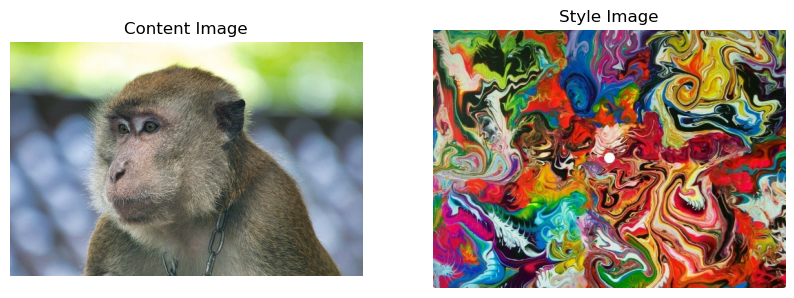

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
imshow(content_image, 'Content Image')
plt.subplot(1,2,2)
imshow(style_image, 'Style Image')

In [ ]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]

plt.figure(figsize=(10,10))
imshow(stylized_image, 'Stylized Image')